<a href="https://colab.research.google.com/github/dewansh2004/Data-Scientis-tools/blob/main/handling_missing_values(CAA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/data_science_job.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [7]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [8]:
df.shape

(19158, 13)

In [9]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13789,0.754,Full time course,Graduate,9.0,9.0
13016,0.776,Full time course,Graduate,6.0,84.0
1795,0.624,no_enrollment,Graduate,7.0,76.0
14886,0.926,no_enrollment,Masters,3.0,4.0
2861,0.920,no_enrollment,Masters,20.0,63.0


In [11]:
#after removing missing data how much data is remaining
len(df[cols].dropna())/len(df)

0.8968577095730244

In [13]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

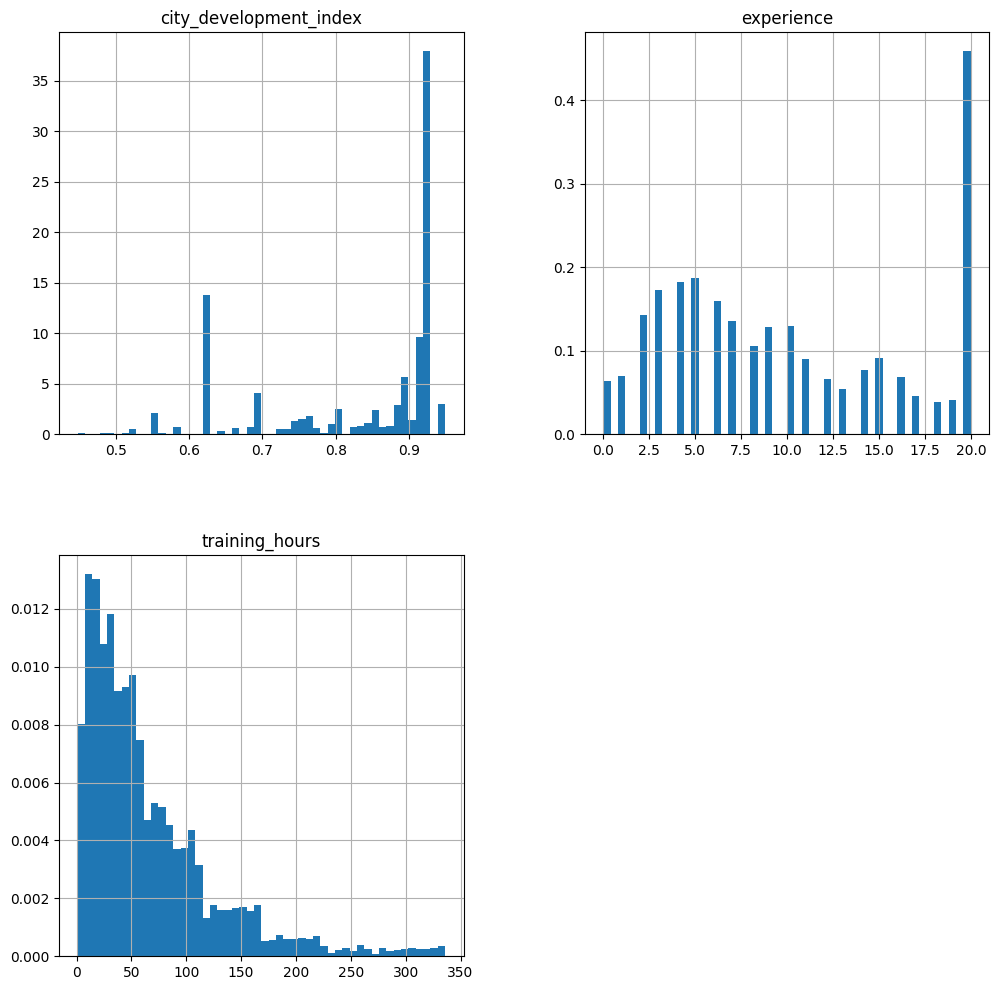

In [16]:
new_df.hist(bins=50, density=True, figsize=(12,12))

array([[<Axes: title={'center': 'enrollee_id'}>,
        <Axes: title={'center': 'city_development_index'}>],
       [<Axes: title={'center': 'experience'}>,
        <Axes: title={'center': 'training_hours'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

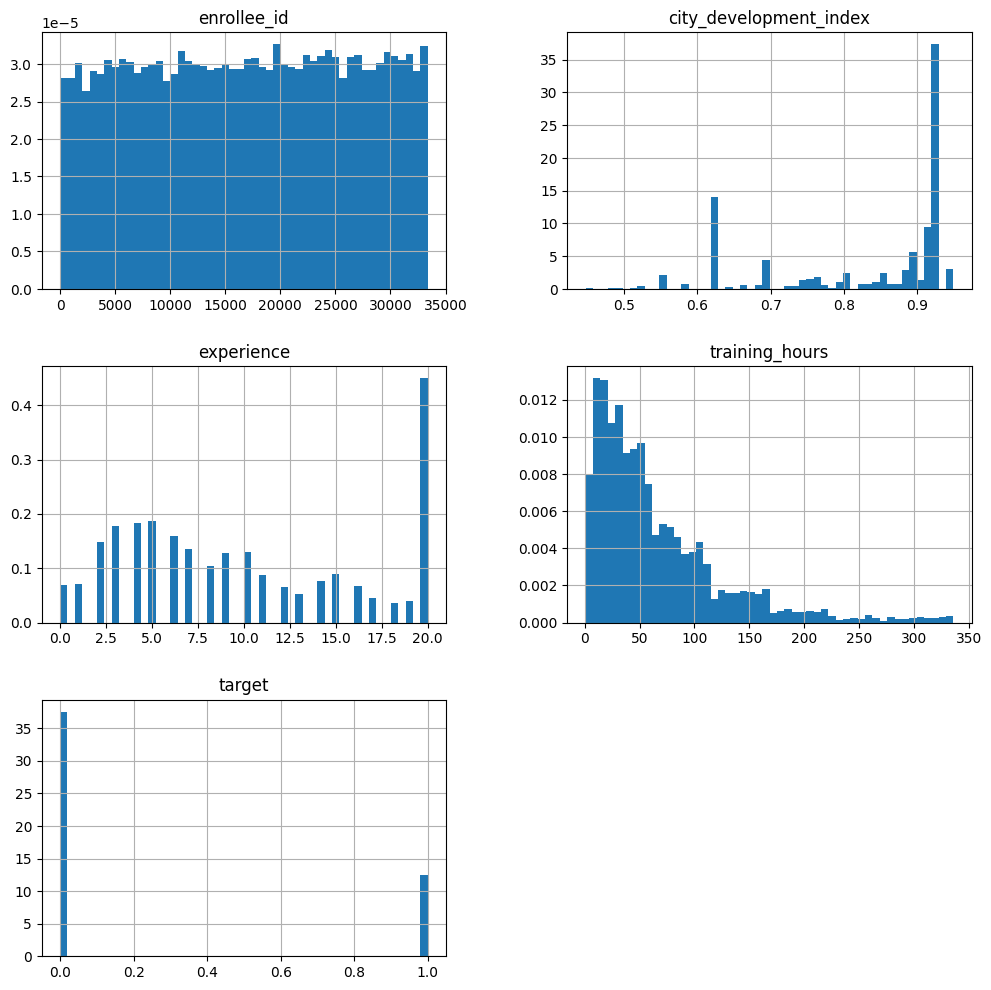

In [17]:
df.hist(bins=50, density=True, figsize=(12,12))

<Axes: >

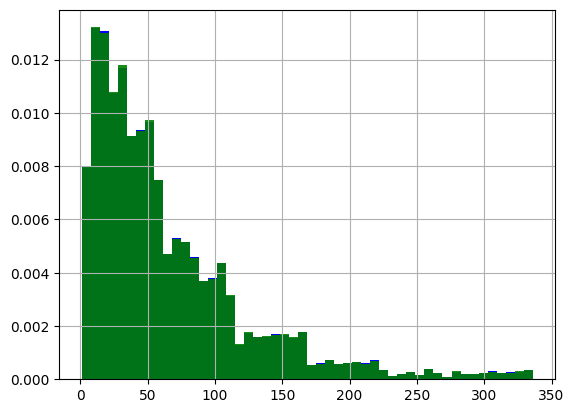

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orginal data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='blue')

# data after cca, the argument alpha makes the color transparent so we can see
# the overlay of the two distribution
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.9)

<Axes: ylabel='Density'>

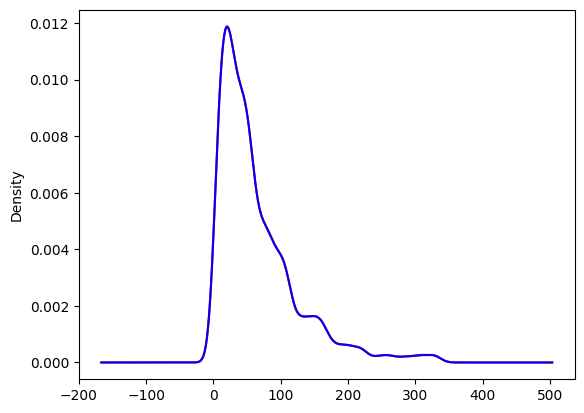

In [33]:
from matplotlib.typing import ColourType
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal data
df['training_hours'].plot.density(color='red')
#after cca
new_df['training_hours'].plot.density(color='blue')

<Axes: >

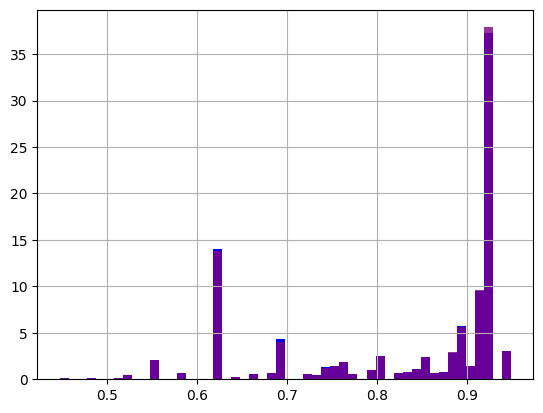

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='blue')
#data after cca, the argument aplha makes color transparent, so we can see the overlay of the two distribution
new_df['city_development_index'].hist(bins=50, ax=ax, color='purple', density=True, alpha=0.8)

<Axes: ylabel='Density'>

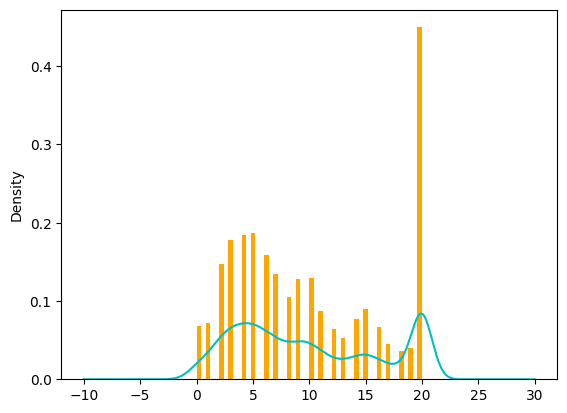

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].hist(bins=50, ax=ax, color='orange', density=True)
new_df['experience'].plot.density(color='c')

In [40]:
temp = pd.concat([
    #percentage of observations per category(original data)
    df['enrolled_university'].value_counts(normalize=True),
    #percentage of observations per category(data after cca)
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)

#add columns name
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.736043,0.735188
Full time course,0.200139,0.200733
Part time course,0.063818,0.064079


In [41]:
temp = pd.concat([
    #percentage of observations per category(original data)
     df['education_level'].value_counts(normalize=True),
     #percentage of observations per category(data after cca)
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)
#add columns name
temp.columns = ['original', 'caa']
temp


,original,caa
education_level,,
Graduate,0.620280,0.619835
Masters,0.233234,0.234082
High School,0.107872,0.107380
Phd,0.022141,0.022116
Primary School,0.016472,0.016587
